In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt

In [4]:
#import dataset
Data = pd.read_excel('D:/project/DEXINUS.xls',
                        skiprows=10,
                        index_col=[0],
                        parse_dates=True)
Data.head()

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00


In [5]:
Data.shape

(12649, 1)

In [6]:
#fill missing values by carry fowarding values
fd = Data.fillna(method = 'ffill')
fd.head(50)

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
1973-01-09,8.00
1973-01-10,8.00
1973-01-11,8.00
1973-01-12,8.00


In [7]:
#fill missing values by carry fowarding values
fd = Data.copy(deep=True)
fd['DEXINUS'].fillna(method='ffill', inplace=True)
fd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXINUS  12649 non-null  float64
dtypes: float64(1)
memory usage: 197.6 KB


<AxesSubplot:xlabel='observation_date', ylabel='DEXINUS'>

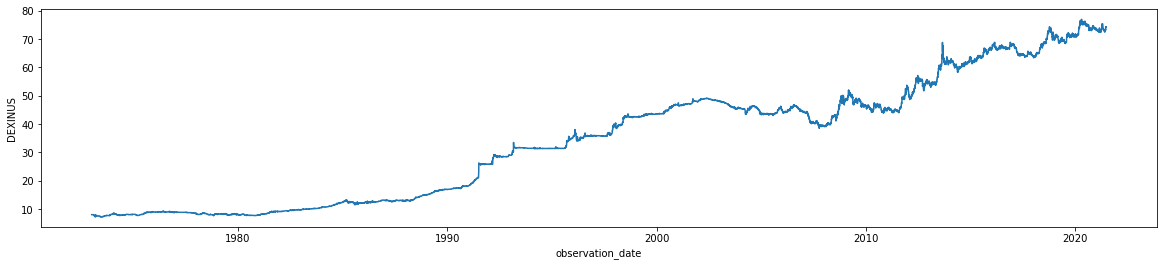

In [8]:
plt.figure(figsize=(20,4))
sns.lineplot(x="observation_date",y="DEXINUS",data=fd)

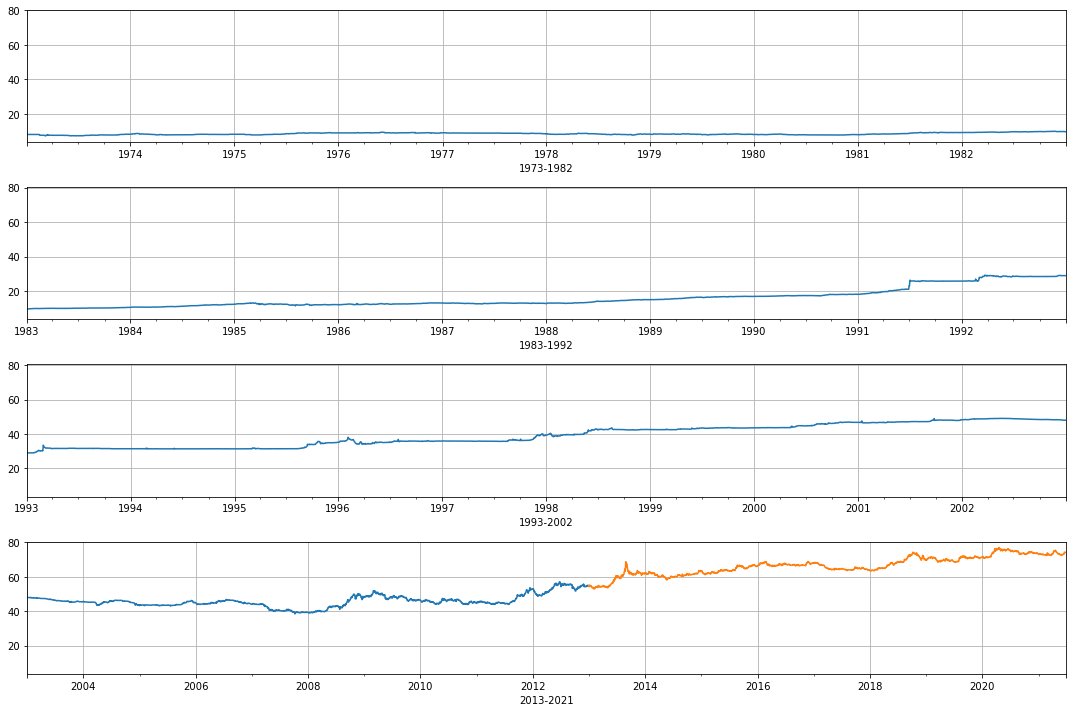

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharey=True)
fd.loc['1973':'1982']['DEXINUS'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
fd.loc['1983':'1992']['DEXINUS'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
fd.loc['1993':'2002']['DEXINUS'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
fd.loc['2003':'2012']['DEXINUS'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
fd.loc['2013':'2022']['DEXINUS'].plot(xlabel="2013-2021",
                                                ax=ax[3],
                                                grid=True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='2020-2021'>

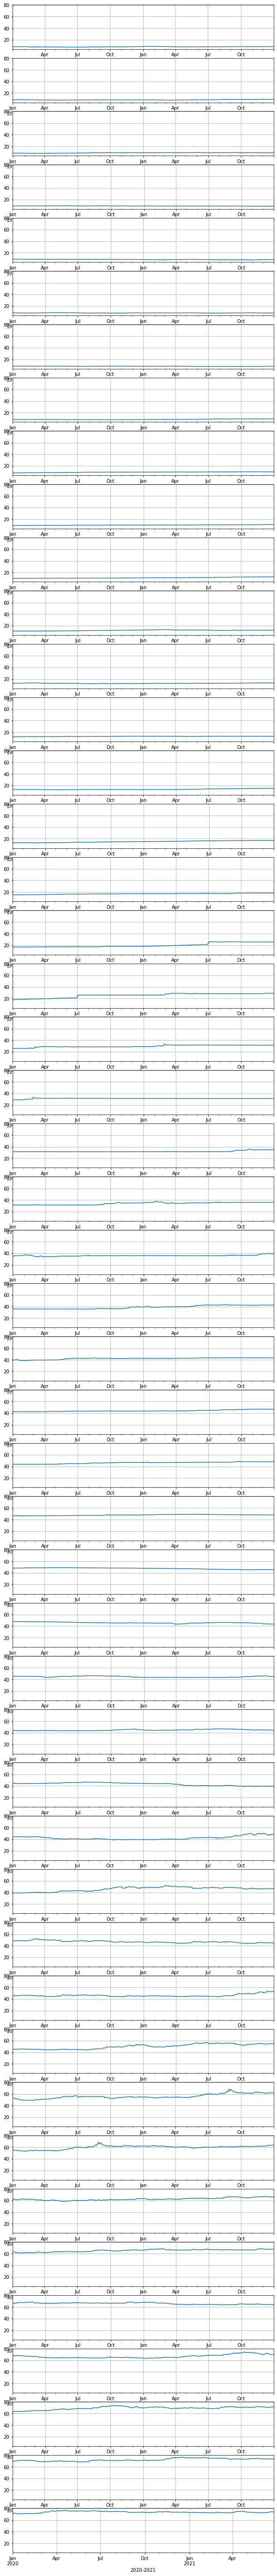

In [10]:
fig, ax = plt.subplots(48, 1, figsize=(10, 100), sharey=True)
fd.loc['1973':'1974']['DEXINUS'].plot(xlabel="1973-1974",stacked=True,ax=ax[0],grid=True)
fd.loc['1974':'1975']['DEXINUS'].plot(xlabel="1974-1975",stacked=True,ax=ax[1],grid=True)
fd.loc['1975':'1976']['DEXINUS'].plot(xlabel="1975-1976",stacked=True,ax=ax[2],grid=True)
fd.loc['1976':'1977']['DEXINUS'].plot(xlabel="1976-1977",stacked=True,ax=ax[3],grid=True)
fd.loc['1977':'1978']['DEXINUS'].plot(xlabel="1977-1978",stacked=True,ax=ax[4],grid=True)
fd.loc['1978':'1979']['DEXINUS'].plot(xlabel="1978-1979",stacked=True,ax=ax[5],grid=True)
fd.loc['1979':'1980']['DEXINUS'].plot(xlabel="1979-1980",stacked=True,ax=ax[6],grid=True)
fd.loc['1980':'1981']['DEXINUS'].plot(xlabel="1980-1981",stacked=True,ax=ax[7],grid=True)
fd.loc['1981':'1982']['DEXINUS'].plot(xlabel="1981-1982",stacked=True,ax=ax[8],grid=True)
fd.loc['1982':'1983']['DEXINUS'].plot(xlabel="1982-1983",stacked=True,ax=ax[9],grid=True)
fd.loc['1983':'1984']['DEXINUS'].plot(xlabel="1983-1984",stacked=True,ax=ax[10],grid=True)
fd.loc['1984':'1985']['DEXINUS'].plot(xlabel="1984-1985",stacked=True,ax=ax[11],grid=True)
fd.loc['1985':'1986']['DEXINUS'].plot(xlabel="1985-1986",stacked=True,ax=ax[12],grid=True)
fd.loc['1986':'1987']['DEXINUS'].plot(xlabel="1986-1987",stacked=True,ax=ax[13],grid=True)
fd.loc['1987':'1988']['DEXINUS'].plot(xlabel="1987-1988",stacked=True,ax=ax[14],grid=True)
fd.loc['1988':'1989']['DEXINUS'].plot(xlabel="1988-1989",stacked=True,ax=ax[15],grid=True)
fd.loc['1989':'1990']['DEXINUS'].plot(xlabel="1989-1990",stacked=True,ax=ax[16],grid=True)
fd.loc['1990':'1991']['DEXINUS'].plot(xlabel="1990-1991",stacked=True,ax=ax[17],grid=True)
fd.loc['1991':'1992']['DEXINUS'].plot(xlabel="1991-1992",stacked=True,ax=ax[18],grid=True)
fd.loc['1992':'1993']['DEXINUS'].plot(xlabel="1992-1993",stacked=True,ax=ax[19],grid=True)
fd.loc['1993':'1994']['DEXINUS'].plot(xlabel="1993-1994",stacked=True,ax=ax[20],grid=True)
fd.loc['1994':'1995']['DEXINUS'].plot(xlabel="1994-1995",stacked=True,ax=ax[21],grid=True)
fd.loc['1995':'1996']['DEXINUS'].plot(xlabel="1995-1996",stacked=True,ax=ax[22],grid=True)
fd.loc['1996':'1997']['DEXINUS'].plot(xlabel="1996-1997",stacked=True,ax=ax[23],grid=True)
fd.loc['1997':'1998']['DEXINUS'].plot(xlabel="1997-1998",stacked=True,ax=ax[24],grid=True)
fd.loc['1998':'1999']['DEXINUS'].plot(xlabel="1998-1999",stacked=True,ax=ax[25],grid=True)
fd.loc['1999':'2000']['DEXINUS'].plot(xlabel="1999-2000",stacked=True,ax=ax[26],grid=True)
fd.loc['2000':'2001']['DEXINUS'].plot(xlabel="2000-2001",stacked=True,ax=ax[27],grid=True)
fd.loc['2001':'2002']['DEXINUS'].plot(xlabel="2001-2002",stacked=True,ax=ax[28],grid=True)
fd.loc['2002':'2003']['DEXINUS'].plot(xlabel="2002-2003",stacked=True,ax=ax[29],grid=True)
fd.loc['2003':'2004']['DEXINUS'].plot(xlabel="2003-2004",stacked=True,ax=ax[30],grid=True)
fd.loc['2004':'2005']['DEXINUS'].plot(xlabel="2004-2005",stacked=True,ax=ax[31],grid=True)
fd.loc['2005':'2006']['DEXINUS'].plot(xlabel="2005-2006",stacked=True,ax=ax[32],grid=True)
fd.loc['2006':'2007']['DEXINUS'].plot(xlabel="2006-2007",stacked=True,ax=ax[33],grid=True)
fd.loc['2007':'2008']['DEXINUS'].plot(xlabel="2007-2008",stacked=True,ax=ax[34],grid=True)
fd.loc['2008':'2009']['DEXINUS'].plot(xlabel="2008-2009",stacked=True,ax=ax[35],grid=True)
fd.loc['2009':'2010']['DEXINUS'].plot(xlabel="2009-2010",stacked=True,ax=ax[36],grid=True)
fd.loc['2010':'2011']['DEXINUS'].plot(xlabel="2010-2011",stacked=True,ax=ax[37],grid=True)
fd.loc['2011':'2012']['DEXINUS'].plot(xlabel="2011-2012",stacked=True,ax=ax[38],grid=True)
fd.loc['2012':'2013']['DEXINUS'].plot(xlabel="2012-2013",stacked=True,ax=ax[39],grid=True)
fd.loc['2013':'2014']['DEXINUS'].plot(xlabel="2013-2014",stacked=True,ax=ax[40],grid=True)
fd.loc['2014':'2015']['DEXINUS'].plot(xlabel="2014-2015",stacked=True,ax=ax[41],grid=True)
fd.loc['2015':'2016']['DEXINUS'].plot(xlabel="2015-2016",stacked=True,ax=ax[42],grid=True)
fd.loc['2016':'2017']['DEXINUS'].plot(xlabel="2016-2017",stacked=True,ax=ax[43],grid=True)
fd.loc['2017':'2018']['DEXINUS'].plot(xlabel="2017-2018",stacked=True,ax=ax[44],grid=True)
fd.loc['2018':'2019']['DEXINUS'].plot(xlabel="2018-2019",stacked=True,ax=ax[45],grid=True)
fd.loc['2019':'2020']['DEXINUS'].plot(xlabel="2019-2020",stacked=True,ax=ax[46],grid=True)
fd.loc['2020':'2021']['DEXINUS'].plot(xlabel="2020-2021",stacked=True,ax=ax[47],grid=True)

# by using LSTM (long short term memory)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
fd1=scaler.fit_transform(np.array(fd).reshape(-1,1))
# min-max scaler used

In [12]:
fd1

array([[0.01189794],
       [0.01189794],
       [0.01161124],
       ...,
       [0.95957569],
       [0.95971904],
       [0.95971904]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(fd1)*0.65)
test_size=len(fd1)-training_size
train_data,test_data=fd1[0:training_size,:],fd1[training_size:len(fd1),:1]

In [14]:
training_size,test_size

(8221, 4428)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(fd1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(fd1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(fd1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(fd1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

In [ ]:
x_input=test_data[4328:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(fd1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(fd1[12549:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=fd1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)